In [1]:
pip install xlrd

     |████████████████████████████████| 96 kB 4.8 MB/s             
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openpyxl

     |████████████████████████████████| 242 kB 5.9 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np 

In [4]:
df=pd.read_excel('dataset.xlsx',
                 sheet_name='Hoja5',
                 engine = 'openpyxl',
                )
df.head(32)

,Edo.,Habs,Cont14dias,Muertes15dias,ContTotales,MuertesTotales,Pruebas
0,Durango,1632934,234,14,67564,3481,5906
1,Quintana Roo,1325578,305,13,90999,4321,8772
2,Chiapas,4796580,389,27,33617,2384,70575
3,Morelos,1777227,482,30,65844,5162,9189
4,Coahuila de Zaragoza,2748391,528,43,143460,8700,17152
5,Campeche,822441,552,21,33309,2220,6996
6,Zacatecas,1490668,666,19,67067,3827,5089
7,Baja California,3155070,676,73,129391,12095,43741
8,Yucatán,1955577,736,21,108277,6368,14769
9,Guerrero,3388768,743,39,97186,6666,4236


## Descripción del dataset elegido.
##### En la tabla anterior se muestra la propagación del COVID-19 en México a través de datos y visualizaciones actualizadas frecuentemente

In [6]:
df.columns

Index(['Edo.', 'Habs', 'Cont14dias', 'Muertes15dias', 'ContTotales',
       'MuertesTotales', 'Pruebas'],
      dtype='object')

## Filtrar, eliminar columnas o datos irrelevantes
Eliminaré la columna "Pruebas" porque para las preguntas que contestaremos son irrelevantes. 

In [8]:
df.drop(['Pruebas'],
        axis=1,
        inplace=True)
df.columns

Index(['Edo.', 'Habs', 'Cont14dias', 'Muertes15dias', 'ContTotales',
       'MuertesTotales'],
      dtype='object')

## Reenombrar columnas
Modificare los titulos de cada columna para que sean mas faciles de entender al lector

In [10]:
df.rename(columns = {'Edo.': 'Estado',
                     'Habs': 'Habitantes',
                     'Cont14dias':'Contagios las últimas dos semanas',
                     'Muertes15dias':'Defunciones las últimas dos semanas',
                     'ContTotales':'Contagios Acumulados',
                     'MuertesTotales': 'Defunciones Acumuladas'},
          inplace=True
         )

In [11]:
df.columns

Index(['Estado', 'Habitantes', 'Contagios las últimas dos semanas',
       'Defunciones las últimas dos semanas', 'Contagios Acumulados',
       'Defunciones Acumuladas'],
      dtype='object')

##### Cambiamos la variable de numeros a string (text)

In [12]:
df.columns=list(map(str,df.columns))
df.columns

Index(['Estado', 'Habitantes', 'Contagios las últimas dos semanas',
       'Defunciones las últimas dos semanas', 'Contagios Acumulados',
       'Defunciones Acumuladas'],
      dtype='object')

## Describir variables
* `Estado` - Variable de tipo String, que muestra el Estado de la Republica del que se mostraran los datos.
* `Habitantes:` - Cantidad total de habitantes de dicho estado segun INEGI, hasta el año 2020. 
* `Contagios las últimas dos semanas:`- Por medio de una variable String, se muestran los contagios de COVID19 en los últimos 14 días.
* `Defunciones las últimas dos semanas`- Esta columna representa los fallecimientos que se han presentado en los últimos 14 días.
* `Contagios Acumulados`- Podemos observar el total de casos SARS COVID 19 desde el inicio de la pandemia en el estado correspondiente.
* `Defunciones Acumuladas`- Total de fallecimientos hasta el día de hoy desde Marzo 2019.

## Pregunta #1
1. Como se puede observar la distribución de casos totales en Nuevo Leon desde el inicio de la pandemia comparado con los de Sinaloa?

#### Como nuestros datos se basan en un Estado, necesitamos que esta columna sea nuestro index: 

In [14]:
df.set_index('Estado', inplace=True)
df.head(32)

,Habitantes,Contagios las últimas dos semanas,Defunciones las últimas dos semanas,Contagios Acumulados,Defunciones Acumuladas
Estado,,,,,
Durango,1632934,234,14,67564,3481
Quintana Roo,1325578,305,13,90999,4321
Chiapas,4796580,389,27,33617,2384
Morelos,1777227,482,30,65844,5162
Coahuila de Zaragoza,2748391,528,43,143460,8700
Campeche,822441,552,21,33309,2220
Zacatecas,1490668,666,19,67067,3827
Baja California,3155070,676,73,129391,12095
Yucatán,1955577,736,21,108277,6368


#### Ubicamos Nuevo Leon y Sinaloa dentro de todos los estados:

In [15]:
df.loc['Nuevo León',:]

Habitantes                             4653458
Contagios las últimas dos semanas         2118
Defunciones las últimas dos semanas         93
Contagios Acumulados                    307411
Defunciones Acumuladas                   14825
Name: Nuevo León, dtype: int64

In [16]:
df.loc['Sinaloa',:]

Habitantes                             2767761
Contagios las últimas dos semanas         2264
Defunciones las últimas dos semanas         65
Contagios Acumulados                    119209
Defunciones Acumuladas                    9545
Name: Sinaloa, dtype: int64

##### Graficamos los datos anteriores: 

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Elegir estilo de la grafica 

In [19]:
print(mpl.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [20]:
mpl.style.use('tableau-colorblind10')

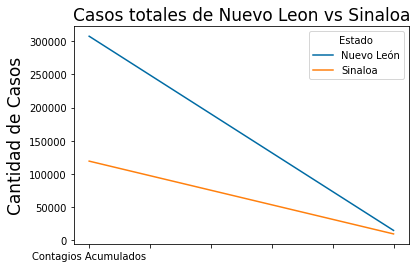

In [21]:
ci=df.loc[['Nuevo León','Sinaloa'],'Contagios Acumulados':].transpose()
ci.plot()
plt.ylabel('Cantidad de Casos', fontsize=17)
plt.title('Casos totales de Nuevo Leon vs Sinaloa', fontsize=17)
plt.show()

## Conclusión pregunta 1. :
Podemos observar claramente que los casos del Estado de Nuevo León son superiores a los de Sinaloa por bastante.
Esto mismo nos lleva a la 2da pregunta:

## Pregunta #2
2. Que tanta diferencia hay entre la población de Nuevo León y de Sinaloa?

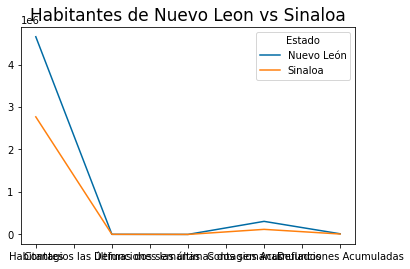

In [48]:
ci=df.loc[['Nuevo León','Sinaloa'],'Habitantes':].transpose()
ci.plot()
plt.title('Habitantes de Nuevo Leon vs Sinaloa', fontsize=17)
plt.show()

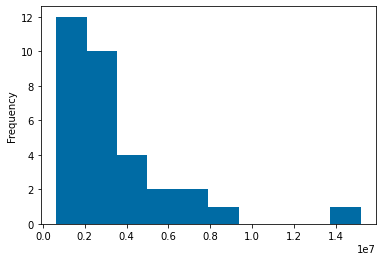

In [40]:
df['Habitantes'].plot(kind='hist')
plt.show()

In [41]:
px.bar(Habitantes, x="Nuevo León", y="Habitantes", color='Estado')

NameError: name 'px' is not defined

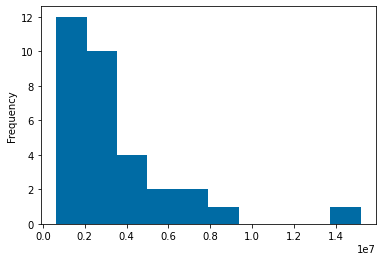

In [42]:
df['Habitantes'].plot(kind='hist')
plt.show()